# Loneliness Scale

In [7]:
import pandas as pd

# Load the data from the CSV file
file_path = './survey/LonelinessScale.csv'
loneliness_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its columns to understand its structure
loneliness_data.head(), loneliness_data.columns

(   uid type 1. I feel in tune with the people around me  \
 0  u00  pre                                   Sometimes   
 1  u01  pre                                   Sometimes   
 2  u02  pre                                   Sometimes   
 3  u03  pre                                   Sometimes   
 4  u04  pre                                   Sometimes   
 
   2. I lack companionship 3. There is no one I can turn to  \
 0                  Rarely                            Never   
 1                  Rarely                           Rarely   
 2                  Rarely                           Rarely   
 3                  Rarely                            Never   
 4               Sometimes                        Sometimes   
 
   4. I do not feel alone 5. I feel part of a group of friends  \
 0                  Never                                Often   
 1              Sometimes                                Often   
 2                  Often                                Oft

In [8]:
for column in loneliness_data.columns[2:5]:  # Check first three survey columns
    print(f"Unique values in {column}: {loneliness_data[column].astype(str).str.strip().str.title().unique()}")

response_mapping = {
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4
}

# Apply the mapping to replace the textual responses with numeric scores
for column in loneliness_data.columns[2:]:  # Assuming first two columns are 'uid' and 'type'
    loneliness_data[column] = loneliness_data[column].astype(str).str.title().map(response_mapping)


Unique values in 1. I feel in tune with the people around me: ['Sometimes' 'Rarely' 'Often']
Unique values in 2. I lack companionship: ['Rarely' 'Sometimes' 'Never' 'Often']
Unique values in 3. There is no one I can turn to: ['Never' 'Rarely' 'Sometimes' 'Often']


In [9]:
print("NaN counts after mapping:")
print(loneliness_data.isna().sum())

NaN counts after mapping:
uid                                                            0
type                                                           0
1. I feel in tune with the people around me                    0
2. I lack companionship                                        0
3. There is no one I can turn to                               0
4. I do not feel alone                                         0
5. I feel part of a group of friends                           0
6. I have a lot in common with the people around me            0
7. I am no longer close to anyone                              0
8. My interests and ideas are not shared by those around me    0
9. I am an outgoing person                                     0
10. There are people I feel close to                           0
11. I feel left out                                            0
12. My social relationships are superficial                    0
13. No one really knows me well                                0

In [10]:
print("Unique 'type' values before adjustment:", loneliness_data['type'].unique())

# Normalize 'type' field for consistency
loneliness_data['type'] = loneliness_data['type'].str.strip().str.title()

# Verify 'uid' consistency and format
print("Unique 'uid' values check (sample):", loneliness_data['uid'].sample(5))

# Identify participants who have both Pre and Post data
pre_participants = set(loneliness_data[loneliness_data['type'] == 'Pre']['uid'])
post_participants = set(loneliness_data[loneliness_data['type'] == 'Post']['uid'])
common_participants = pre_participants & post_participants

print(f"Number of participants in Pre only: {len(pre_participants)}")
print(f"Number of participants in Post only: {len(post_participants)}")
print(f"Number of common participants: {len(common_participants)}")

# Filter datasets to only include common participants
pre_data = loneliness_data[(loneliness_data['type'] == 'Pre') & (loneliness_data['uid'].isin(common_participants))]
post_data = loneliness_data[(loneliness_data['type'] == 'Post') & (loneliness_data['uid'].isin(common_participants))]

# Save the filtered data
pre_data.to_csv('./data/LonelinessScale/LonelinessScale_Pre.csv', index=False)
post_data.to_csv('./data/LonelinessScale/LonelinessScale_Post.csv', index=False)

# Check final data counts
print("Final Pre data counts (non-NaN):")
print(pre_data.count())
print("\nFinal Post data counts (non-NaN):")
print(post_data.count())

Unique 'type' values before adjustment: ['pre' 'post']
Unique 'uid' values check (sample): 7     u08
51    u07
3     u03
38    u50
6     u07
Name: uid, dtype: object
Number of participants in Pre only: 46
Number of participants in Post only: 37
Number of common participants: 37
Final Pre data counts (non-NaN):
uid                                                            37
type                                                           37
1. I feel in tune with the people around me                    37
2. I lack companionship                                        37
3. There is no one I can turn to                               37
4. I do not feel alone                                         37
5. I feel part of a group of friends                           37
6. I have a lot in common with the people around me            37
7. I am no longer close to anyone                              37
8. My interests and ideas are not shared by those around me    37
9. I am an outgoing person  

In [11]:
pre_data = pd.read_csv('./data/LonelinessScale/LonelinessScale_Pre.csv')
post_data = pd.read_csv('./data/LonelinessScale/LonelinessScale_Post.csv')

# Check final data counts
print("Final Pre data counts (non-NaN):")
print(pre_data.count())
print("\nFinal Post data counts (non-NaN):")
print(post_data.count())

# calculate the sum of the scores for each participant
pre_data['total_score'] = pre_data.iloc[:, 2:].sum(axis=1)
post_data['total_score'] = post_data.iloc[:, 2:].sum(axis=1)

# Save the total scores
pre_data.to_csv('./data/LonelinessScale/LonelinessScale_Pre.csv', index=False)
post_data.to_csv('./data/LonelinessScale/LonelinessScale_Post.csv', index=False)

Final Pre data counts (non-NaN):
uid                                                            37
type                                                           37
1. I feel in tune with the people around me                    37
2. I lack companionship                                        37
3. There is no one I can turn to                               37
4. I do not feel alone                                         37
5. I feel part of a group of friends                           37
6. I have a lot in common with the people around me            37
7. I am no longer close to anyone                              37
8. My interests and ideas are not shared by those around me    37
9. I am an outgoing person                                     37
10. There are people I feel close to                           37
11. I feel left out                                            37
12. My social relationships are superficial                    37
13. No one really knows me well            

In [12]:
# Calculate the mean,median,mode,SD total score for each group

pre_mean = pre_data['total_score'].mean()
post_mean = post_data['total_score'].mean()
pre_median = pre_data['total_score'].median()
post_median = post_data['total_score'].median()
pre_mode = pre_data['total_score'].mode()
post_mode = post_data['total_score'].mode()
pre_sd = pre_data['total_score'].std()
post_sd = post_data['total_score'].std()

print(f"Pre Mean: {pre_mean}")
print(f"Post Mean: {post_mean}")
print(f"Pre Median: {pre_median}")
print(f"Post Median: {post_median}")
print(f"Pre Mode: {pre_mode}")
print(f"Post Mode: {post_mode}")
print(f"Pre Standard Deviation: {pre_sd}")
print(f"Post Standard Deviation: {post_sd}")

Pre Mean: 54.108108108108105
Post Mean: 53.62162162162162
Pre Median: 53.0
Post Median: 53.0
Pre Mode: 0    53
dtype: int64
Post Mode: 0    51
1    53
dtype: int64
Pre Standard Deviation: 4.053693677676254
Post Standard Deviation: 5.095484664285034


## Visualization of Data

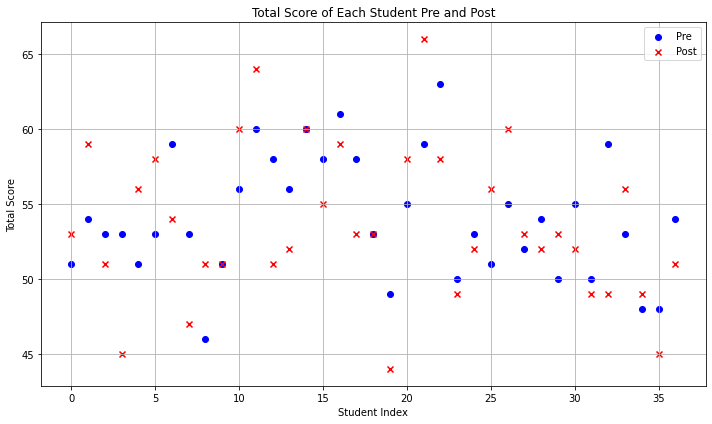

In [13]:
import matplotlib.pyplot as plt

# Load the pre and post datasets
pre_data = pd.read_csv('./data/LonelinessScale/LonelinessScale_Pre.csv')
post_data = pd.read_csv('./data/LonelinessScale/LonelinessScale_Post.csv')

# Plot the total score for each student pre and post
plt.figure(figsize=(10, 6))

# Plot pre data
plt.scatter(pre_data.index, pre_data['total_score'], label='Pre', color='blue', marker='o')

# Plot post data
plt.scatter(post_data.index, post_data['total_score'], label='Post', color='red', marker='x')

# Add labels and title
plt.xlabel('Student Index')
plt.ylabel('Total Score')
plt.title('Total Score of Each Student Pre and Post')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


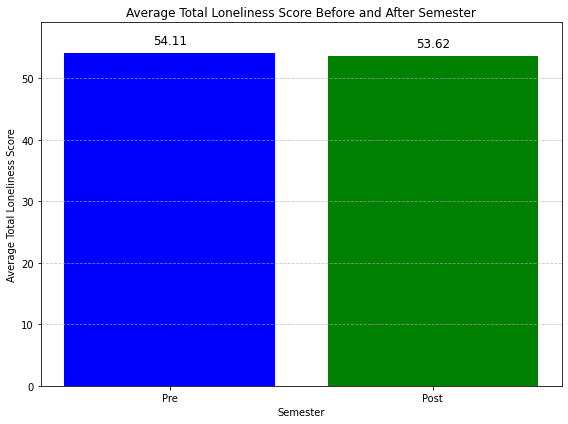

In [14]:
avg_pre_total_score = pre_data['total_score'].mean()
avg_post_total_score = post_data['total_score'].mean()

# Create a bar plot to visualize the change
plt.figure(figsize=(8, 6))
plt.bar(['Pre', 'Post'], [avg_pre_total_score, avg_post_total_score], color=['blue', 'green'])
plt.title('Average Total Loneliness Score Before and After Semester')
plt.xlabel('Semester')
plt.ylabel('Average Total Loneliness Score')
plt.ylim(0, max(avg_pre_total_score, avg_post_total_score) + 5)  # Adjust ylim for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the exact values
for i, score in enumerate([avg_pre_total_score, avg_post_total_score]):
    plt.text(i, score + 1, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


## Paired T-Test

In [15]:
from scipy.stats import shapiro, levene

# Extract total loneliness scores for pre and post data
pre_total_scores = pre_data['total_score']
post_total_scores = post_data['total_score']

# Shapiro-Wilk test for normality
_, pre_shapiro_pvalue = shapiro(pre_total_scores)
_, post_shapiro_pvalue = shapiro(post_total_scores)

# Levene's test for equal variance
_, levene_pvalue = levene(pre_total_scores, post_total_scores)

# Print the p-values
print("Shapiro-Wilk p-value for pre data:", pre_shapiro_pvalue)
print("Shapiro-Wilk p-value for post data:", post_shapiro_pvalue)
print("Levene's p-value:", levene_pvalue)

Shapiro-Wilk p-value for pre data: 0.5598384141921997
Shapiro-Wilk p-value for post data: 0.4880509078502655
Levene's p-value: 0.31221946972607567


In [16]:
from scipy.stats import ttest_rel

# Perform paired t-test
t_statistic, p_value = ttest_rel(pre_total_scores, post_total_scores)

# Output the results
print("Paired t-test results:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Check for statistical significance
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("The change in average total loneliness score is statistically significant.")
else:
    print("The change in average total loneliness score is not statistically significant.")


Paired t-test results:
t-statistic: 0.6853034684986072
p-value: 0.49754179363789697
The change in average total loneliness score is not statistically significant.


In [17]:
import numpy as np

mean_pre = np.mean(pre_total_scores)
mean_post = np.mean(post_total_scores)

# Calculate pooled standard deviation
n_pre = len(pre_total_scores)
n_post = len(post_total_scores)
var_pre = np.var(pre_total_scores, ddof=1)  # Use ddof=1 for sample variance
var_post = np.var(post_total_scores, ddof=1)
pooled_std = np.sqrt(((n_pre - 1) * var_pre + (n_post - 1) * var_post) / (n_pre + n_post - 2))

# Calculate Cohen's d
cohen_d = (mean_post - mean_pre) / pooled_std

print("Cohen's d:", cohen_d)

Cohen's d: -0.10566260336666422


# Pre and Post

In [18]:
import pandas as pd
from scipy import stats

# Load the pre and post survey data from separate CSV files
pre_data = pd.read_csv('./data/LonelinessScale/LonelinessScale_Pre.csv')
post_data = pd.read_csv('./data/LonelinessScale/LonelinessScale_Post.csv')

# Merge the pre and post survey data on the 'uid' column
merged_data = pd.merge(pre_data, post_data, on='uid', suffixes=('_pre', '_post'))

# Calculate the difference between post and pre total scores
merged_data['score_diff'] = merged_data['total_score_post'] - merged_data['total_score_pre']

stat_pre, p_pre = stats.shapiro(merged_data['total_score_pre'])
stat_post, p_post = stats.shapiro(merged_data['total_score_post'])

print(f"Pre data normality test: statistic={stat_pre}, p-value={p_pre}")
print(f"Post data normality test: statistic={stat_post}, p-value={p_post}")


# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(merged_data['total_score_post'], merged_data['total_score_pre'])

print(f"T-statistic: {t_stat}, p-value: {p_value}")

Pre data normality test: statistic=0.9750059247016907, p-value=0.5598384141921997
Post data normality test: statistic=0.9727562665939331, p-value=0.4880509078502655
T-statistic: -0.6853034684986072, p-value: 0.49754179363789697
